In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
"""
Channel 1
"""
data9 = np.genfromtxt("LS2CH1_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch1_0x, ls2_ch1_0y = data9[:,0],data9[:,1]
data10 = np.genfromtxt("LS2CH1_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch1_1x, ls2_ch1_1y = data10[:,0],data10[:,1]

"""
Channel 2
"""
data11 = np.genfromtxt("LS2CH2_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch2_0x, ls2_ch2_0y = data11[:,0],data11[:,1]
data12 = np.genfromtxt("LS2CH2_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch2_1x, ls2_ch2_1y = data12[:,0],data12[:,1]

"""
Channel 3
"""
data13 = np.genfromtxt("LS2CH3_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch3_0x, ls2_ch3_0y = data13[:,0],data13[:,1]
data14 = np.genfromtxt("LS2CH3_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch3_1x, ls2_ch3_1y = data14[:,0],data14[:,1]

"""
Channel 4
"""
data15 = np.genfromtxt("LS2CH4_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch4_0x, ls2_ch4_0y = data15[:,0],data15[:,1]
data16 = np.genfromtxt("LS2CH4_5330.0-5390.0sec.txt", autostrip = True)
ls2_ch4_1x, ls2_ch4_1y = data16[:,0],data16[:,1]



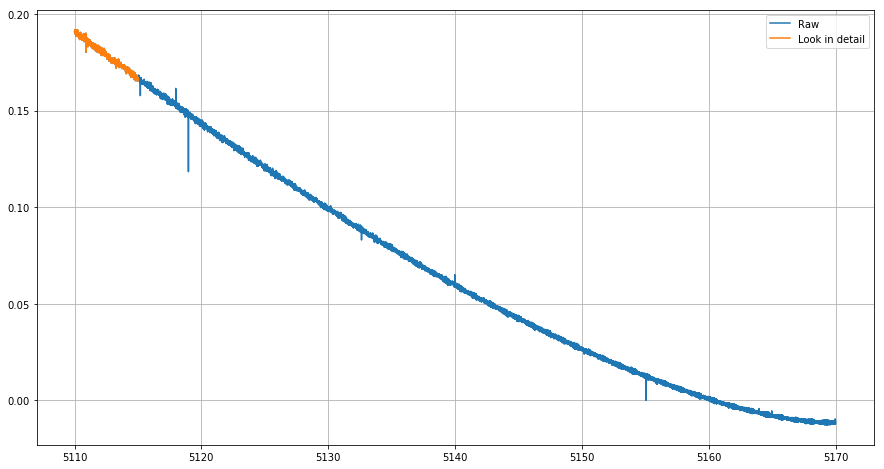

In [4]:
seconds = 5
startt = 0 #40 
start = int(startt*600)
end = int(seconds*600)

tchunk1=ls2_ch4_0x[start:start+end]
vchunk1=ls2_ch4_0y[start:start+end]

plt.figure(figsize=(15,8))
plt.grid()
plt.plot(ls2_ch4_0x,ls2_ch4_0y,label="Raw")
plt.plot(tchunk1,vchunk1,label="Look in detail")
plt.legend()
plt.show()

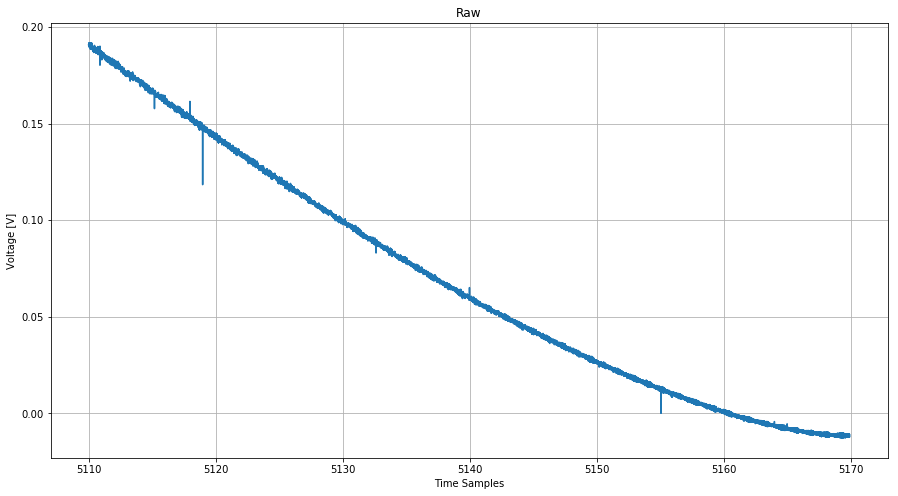

In [10]:
fig = plt.figure(figsize=(15,8))
plt.title('Raw')
plt.plot(tchunk1,vchunk1)
plt.xlabel('Time Samples')
plt.ylabel('Voltage [V]')
plt.grid()
plt.show()

In [11]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y




# Sample rate and desired cutoff frequencies (in Hz).
fs = 600.0
lowcut = 70 #70
highcut = 200 #200



y = butter_bandpass_filter(vchunk1, lowcut, highcut, fs, order=3)
#np.savetxt('70_200hz_ch4.txt',(tchunk1,y))

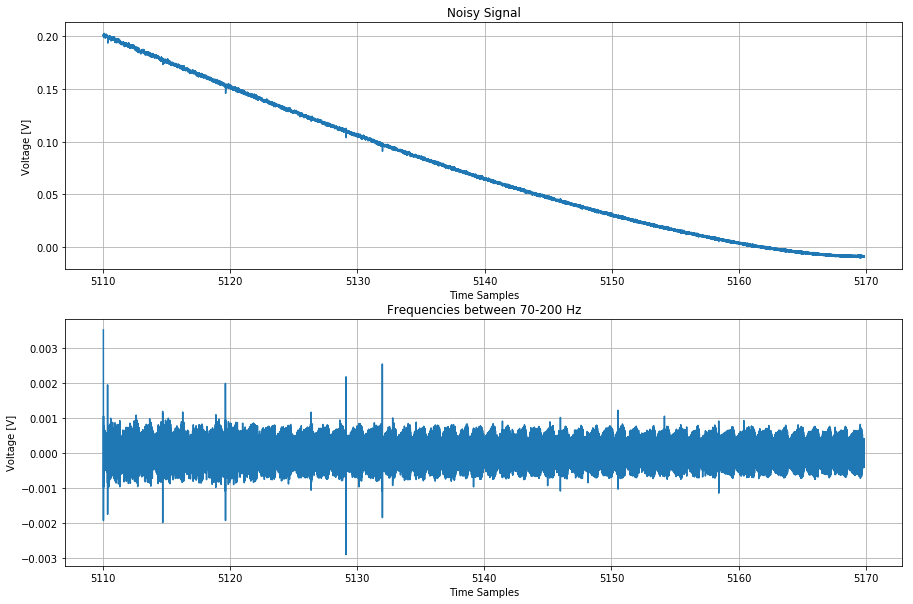

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(tchunk1, vchunk1)
plt.grid()
plt.title('Noisy Signal')
plt.xlabel('Time Samples')
plt.ylabel('Voltage [V]')

plt.subplot(212)
y = butter_bandpass_filter(vchunk1, lowcut, highcut, fs, order=3)
plt.plot(tchunk1[15:], y[15:], label='Filtered signal')
plt.grid()
plt.title('Frequencies between ' + str(lowcut)+ '-' + str(highcut) + ' Hz')
plt.xlabel('Time Samples')
plt.ylabel('Voltage [V]')
plt.axis('tight')
plt.show()

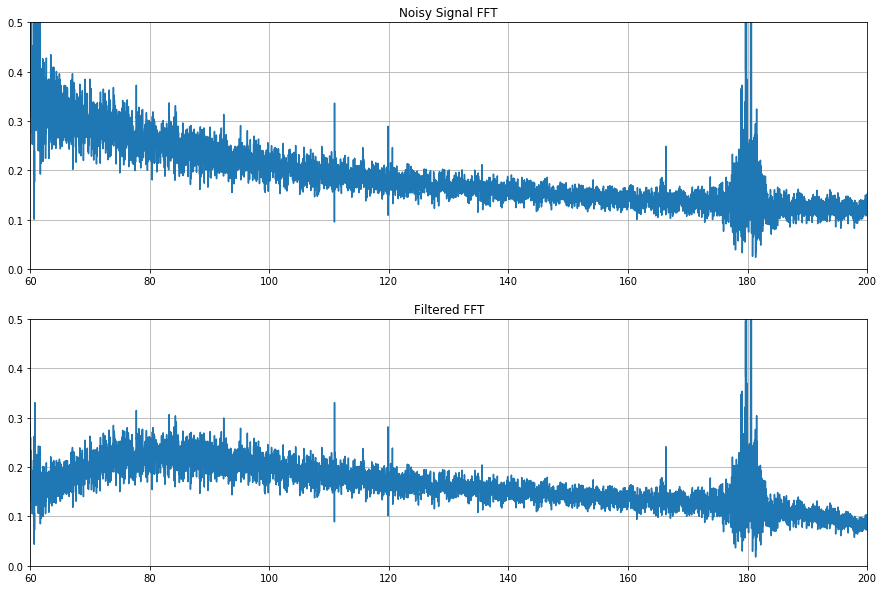

In [25]:
import scipy.fftpack as fft

noisy_fft = fft.fft(vchunk1)
filtered_fft = fft.fft(y)
xf = np.linspace(0,600,len(noisy_fft))

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.grid()
plt.xlim(60,200)
plt.ylim(0,0.5)
plt.plot(xf,np.abs(noisy_fft))
plt.title('Noisy Signal FFT')


plt.subplot(212)
plt.grid()
plt.plot(xf,np.abs(filtered_fft))
plt.xlim(60,200)
plt.ylim(0,0.5)
plt.title('Filtered FFT')
plt.show()